In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Charger les données
df = pd.read_csv('data.csv')  # Remplace par le nom de ton fichier
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. Garde seulement les colonnes utiles
df = df[['temp2_max(c)','temp2_min(c)','temp2_ave(c)','suface_pressure(pa)','wind_speed50_max(m/s)','wind_speed50_min(m/s)','wind_speed50_ave(m/s)','prectotcorr','total_demand(mw)','max_generation(mw)']].dropna()

# 3. Définir la cible et les variables exogènes
y = df['max_generation(mw)']
X = df[['temp2_max(c)','temp2_min(c)','temp2_ave(c)','suface_pressure(pa)','wind_speed50_max(m/s)','wind_speed50_min(m/s)','wind_speed50_ave(m/s)','prectotcorr','total_demand(mw)']]

# 4. Split train / test
train_size = int(len(df) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

# 5. Entraîner le modèle SARIMAX (simple configuration)
model = SARIMAX(y_train,
                exog=X_train,
                order=(1, 1, 1),  # Ajustable
                seasonal_order=(0, 0, 0, 0),  # Pas de composante saisonnière pour simplifier
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# 6. Prédictions
pred = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# 7. Évaluation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f'RMSE: {rmse:.2f}')


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 495.41


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


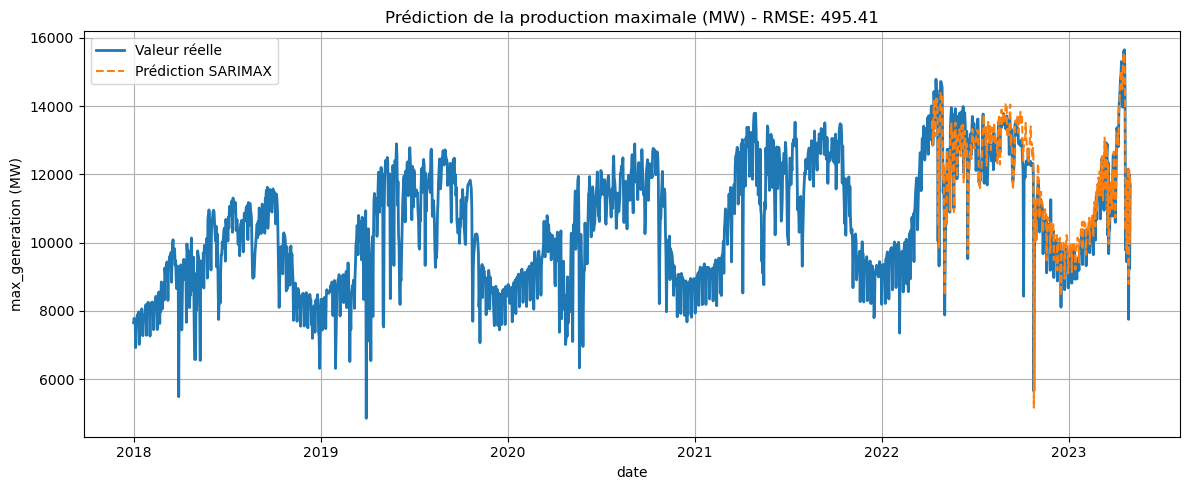

In [3]:
# 8. Visualisation
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['max_generation(mw)'], label='Valeur réelle', linewidth=2)
plt.plot(y_test.index, pred, label='Prédiction SARIMAX', linestyle='--')
plt.legend()
plt.title(f'Prédiction de la production maximale (MW) - RMSE: {rmse:.2f}')
plt.xlabel('date')
plt.ylabel('max_generation (MW)')
plt.grid(True)
plt.tight_layout()
# Assuming the last date in the index is your starting date
start_date = df.index[-1] + pd.Timedelta(days=1)
# Generate a date range for 1 year
date_range_for_year = pd.date_range(start=start_date, periods=365, freq='D')  # Adjust 'periods' for leap year
plt.show()